In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import yaml

In [19]:
experiment = '20210210-085809'
base = "../results"
history_file = os.path.join(base, experiment,"history.csv")
config_file = os.path.join(base, experiment, "config.yaml")

with open(config_file, 'r') as file_descriptor:
        config = yaml.load(file_descriptor, Loader=yaml.FullLoader)
df = pd.read_csv(history_file)
df.head(11)

,Unnamed: 0,Gen_G_loss,Cycle_X_loss,Disc_X_loss,Gen_F_loss,Cycle_Y_loss,Disc_Y_loss,x_acc,y_acc,x_c_acc,y_c_acc,temp_diff_x,temp_diff_y
0,0,"tf.Tensor(0.47436953, shape=(), dtype=float32)","tf.Tensor(4.017557, shape=(), dtype=float32)","tf.Tensor(1.447895, shape=(), dtype=float32)","tf.Tensor(0.47489628, shape=(), dtype=float32)","tf.Tensor(2.4655502, shape=(), dtype=float32)","tf.Tensor(1.4474106, shape=(), dtype=float32)","tf.Tensor(0.06368574, shape=(), dtype=float32)","tf.Tensor(0.055874627, shape=(), dtype=float32)","tf.Tensor(0.050091658, shape=(), dtype=float32)","tf.Tensor(0.052871723, shape=(), dtype=float32)","tf.Tensor(18.122517, shape=(), dtype=float32)","tf.Tensor(-34.73295, shape=(), dtype=float32)"
1,1,"tf.Tensor(0.4880074, shape=(), dtype=float32)","tf.Tensor(3.6405447, shape=(), dtype=float32)","tf.Tensor(1.435206, shape=(), dtype=float32)","tf.Tensor(0.50918025, shape=(), dtype=float32)","tf.Tensor(2.3554225, shape=(), dtype=float32)","tf.Tensor(1.4165993, shape=(), dtype=float32)","tf.Tensor(0.1773469, shape=(), dtype=float32)","tf.Tensor(0.13764928, shape=(), dtype=float32)","tf.Tensor(0.13785559, shape=(), dtype=float32)","tf.Tensor(0.16856287, shape=(), dtype=float32)",0,0
2,2,"tf.Tensor(0.49797207, shape=(), dtype=float32)","tf.Tensor(3.4501297, shape=(), dtype=float32)","tf.Tensor(1.4287739, shape=(), dtype=float32)","tf.Tensor(0.5449126, shape=(), dtype=float32)","tf.Tensor(2.2920675, shape=(), dtype=float32)","tf.Tensor(1.3872935, shape=(), dtype=float32)","tf.Tensor(0.21211667, shape=(), dtype=float32)","tf.Tensor(0.1935508, shape=(), dtype=float32)","tf.Tensor(0.20981713, shape=(), dtype=float32)","tf.Tensor(0.23633446, shape=(), dtype=float32)",0,0
3,3,"tf.Tensor(0.5032966, shape=(), dtype=float32)","tf.Tensor(3.4285626, shape=(), dtype=float32)","tf.Tensor(1.4224532, shape=(), dtype=float32)","tf.Tensor(0.55779094, shape=(), dtype=float32)","tf.Tensor(2.1732073, shape=(), dtype=float32)","tf.Tensor(1.37645, shape=(), dtype=float32)","tf.Tensor(0.2327818, shape=(), dtype=float32)","tf.Tensor(0.2128503, shape=(), dtype=float32)","tf.Tensor(0.26147634, shape=(), dtype=float32)","tf.Tensor(0.2816312, shape=(), dtype=float32)",0,0
4,4,"tf.Tensor(0.51027054, shape=(), dtype=float32)","tf.Tensor(3.3372478, shape=(), dtype=float32)","tf.Tensor(1.4138231, shape=(), dtype=float32)","tf.Tensor(0.5655987, shape=(), dtype=float32)","tf.Tensor(1.9023039, shape=(), dtype=float32)","tf.Tensor(1.3706968, shape=(), dtype=float32)","tf.Tensor(0.25537014, shape=(), dtype=float32)","tf.Tensor(0.2772091, shape=(), dtype=float32)","tf.Tensor(0.31845593, shape=(), dtype=float32)","tf.Tensor(0.33904842, shape=(), dtype=float32)",0,0
5,5,"tf.Tensor(0.5150889, shape=(), dtype=float32)","tf.Tensor(3.2742116, shape=(), dtype=float32)","tf.Tensor(1.4094363, shape=(), dtype=float32)","tf.Tensor(0.5708737, shape=(), dtype=float32)","tf.Tensor(1.8564788, shape=(), dtype=float32)","tf.Tensor(1.3669534, shape=(), dtype=float32)","tf.Tensor(0.28508705, shape=(), dtype=float32)","tf.Tensor(0.28340584, shape=(), dtype=float32)","tf.Tensor(0.34433073, shape=(), dtype=float32)","tf.Tensor(0.36179173, shape=(), dtype=float32)",0,0
6,6,"tf.Tensor(0.5191371, shape=(), dtype=float32)","tf.Tensor(3.0802598, shape=(), dtype=float32)","tf.Tensor(1.4060487, shape=(), dtype=float32)","tf.Tensor(0.57400686, shape=(), dtype=float32)","tf.Tensor(1.7890344, shape=(), dtype=float32)","tf.Tensor(1.3646551, shape=(), dtype=float32)","tf.Tensor(0.29202294, shape=(), dtype=float32)","tf.Tensor(0.3041726, shape=(), dtype=float32)","tf.Tensor(0.36678916, shape=(), dtype=float32)","tf.Tensor(0.38919637, shape=(), dtype=float32)",0,0
7,7,"tf.Tensor(0.5237608, shape=(), dtype=float32)","tf.Tensor(2.8937843, shape=(), dtype=float32)","tf.Tensor(1.401506, shape=(), dtype=float32)","tf.Tensor(0.5760295, shape=(), dtype=float32)","tf.Tensor(1.6988262, shape=(), dtype=float32)","tf.Tensor(1.3633027, shape=(), dtype=float32)","tf.Tensor(0.31045166, shape=(), dtype=

In [21]:
keys = ["Gen_G_loss", "Cycle_X_loss", "Disc_X_loss", "Gen_F_loss", "Cycle_Y_loss", "Disc_Y_loss",
        "x_acc", "y_acc", "x_c_acc", "y_c_acc"]
for key in keys:
    for i, e in enumerate(df[key]):
        df[key][i] = float(e.split(',')[0][10:])


/home/sandra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


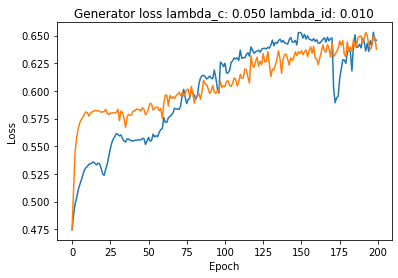

In [22]:
#Plot generator loss



plt.plot(df['Gen_G_loss'])
plt.plot(df['Gen_F_loss'])
plt.title("Generator loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

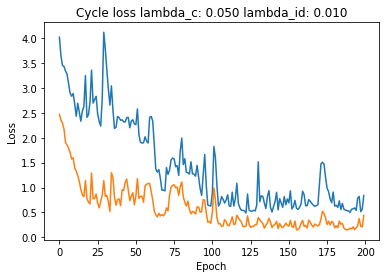

In [23]:
#Plot generator loss



plt.plot(df['Cycle_X_loss'])
plt.plot(df['Cycle_Y_loss'])
plt.title("Cycle loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

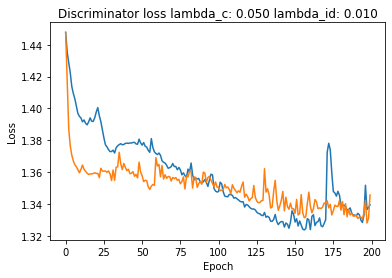

In [24]:
plt.plot(df['Disc_X_loss'])
plt.plot(df['Disc_Y_loss'])
plt.title("Discriminator loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

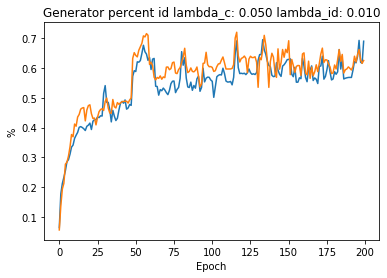

In [25]:
plt.plot(df['x_acc'])
plt.plot(df['y_acc'])
plt.title("Generator percent id lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('%')
plt.show()

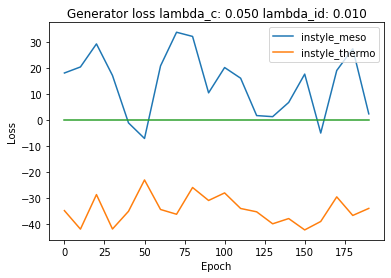

In [26]:
temps_x = []
temps_y = []
step = []
temps_x.append(float(df['temp_diff_x'][0].split(',')[0][10:]))
temps_y.append(float(df['temp_diff_y'][0].split(',')[0][10:]))
step.append(0)
for i in range(10,200,10):
    temps_x.append(float(df['temp_diff_x'][i].split(',')[0][10:]))
    temps_y.append(float(df['temp_diff_y'][i].split(',')[0][10:]))
    step.append(i)

plt.plot(step,temps_x)
plt.plot(step,temps_y)
plt.plot(step, np.zeros((20,)))

plt.title("Generator loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['instyle_meso', 'instyle_thermo'])
plt.show()

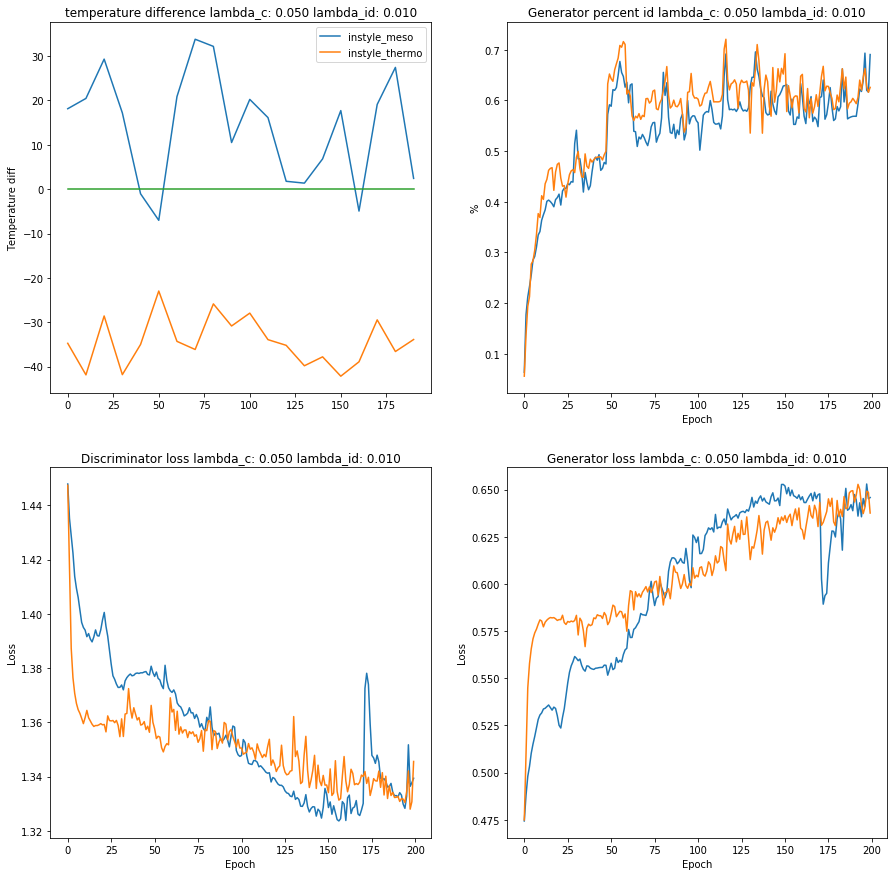

In [27]:
# make subplot

fig = plt.figure(figsize=[15,15])

plt.subplot(221)
plt.plot(step,temps_x)
plt.plot(step,temps_y)
plt.plot(step, np.zeros((20,)))
plt.title("temperature difference lambda_c: %1.3f lambda_id: %1.3f" % 
           (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.ylabel("Temperature diff")
plt.legend(['instyle_meso', 'instyle_thermo'])

plt.subplot(222)
plt.plot(df['x_acc'])
plt.plot(df['y_acc'])
plt.title("Generator percent id lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('%')

plt.subplot(223)
plt.plot(df['Disc_X_loss'])
plt.plot(df['Disc_Y_loss'])
plt.title("Discriminator loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(224)
plt.plot(df['Gen_G_loss'])
plt.plot(df['Gen_F_loss'])
plt.title("Generator loss lambda_c: %1.3f lambda_id: %1.3f" % (config['CycleGan']['lambda_cycle'], config['CycleGan']['lambda_id']))
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()